# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo II - Tratamento de Dados</span>


### <span style="color:darkred">Detecção de outliers</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

__Conteúdo:__
1. *Detecção de outliers: métodos estatísticos e de aprendizado de máquina*
2. Limpeza de dados: tratamento de informações faltantes, redundantes e errôneas
3. Tratamento de desbalanceamento: SMOTE e data augmentation

__Referências:__
- Katti Faceli; Ana Carolina Lorena; João Gama; André C.P.L.F. Carvalho. Inteligência Artificial: uma abordagem de aprendizado de máquina, 2011.
- Salvador García, Julián Luengo, Francisco Herrera. Data Processing in Data Mining, 2015.
- Hadley Wickham, Tidy Data. Journal of Statistical Software, v.59, n.10, 2014.

__Referência complementar:__
- CHANDOLA, Varun; BANERJEE, Arindam; KUMAR, Vipin. Outlier detection: a survey. ACM Computing Surveys, v. 14, p. 15, 2007.

***

## Detectando outliers

**Relembrando - outliers, pontos "fora-da-curva" ou pontos aberrantes** : exemplos ou instâncias que, dentre do espaco de possíveis valores, recaem num intervalo *fora* daquele relativo a maior parte dos exemplos de uma base de dados.

Detectar outliers por meio de análise exploratória é útil para entender o comportamento da base de dados.

Existem também métodos **estatísticos** e de **aprendizado de máquina** que auxiliam nesse processo e que podem facilitar essa análise, detectando *outliers* de forma automática.

1. Dispersão: desvio padrão e intervalo interquartil
2. Distribuição: Normal univaridada
3. Agrupamento

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent
data = pd.read_csv("./dados/houses_to_rent_mba2.csv")
data

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6,1000,2800,nr,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2,270,1112,22,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,São Paulo,150.0,3.0,3,2.0,8,0,13500,0,172,13672.0,2124,114,708,16,flat
11761,Porto Alegre,63.0,2.0,1,1.0,5,402,1478,24,22,1926.0,58,86,116,12,flat
11762,São Paulo,285.0,4.0,4,4.0,17,3100,15000,973,191,19264.0,612,99,204,14,flat
11763,Brotas,100.0,1.0,2,1.0,-,0,800,116,39,955.0,148,127,148,18,house


Vamos visualizar dois atributos para estudar a distribuicao dos dados

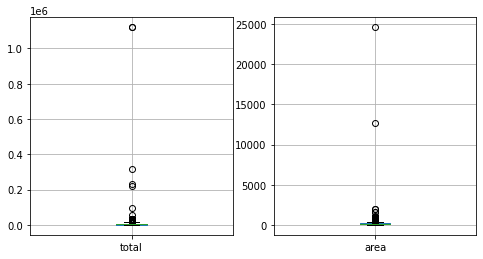

In [2]:
plt.figure(figsize=(8,4))
plt.subplot(121); data.boxplot(['total'])
plt.subplot(122); data.boxplot(['area'])

### 1. Desvio padrão e amplitude inter-quartil (por dispersão)

Para cada atributo, podemos estudar como os valores estão relacionados com a dispersão dos dados.

Entre as medidas de dispersão temos:
* desvio padrão (*standard deviation*)
    Seja $\mu$ a média de uma variável,
    $$\sigma = \frac{\sqrt{ \sum_i (x_i - \mu)^2}}{n}$$


* amplitude - ou intervalo - interquartil (IQR, *interquartile range*)
    Sejam:
    - $Q_{1}$ o valor relativo aos primeiros 25% dados,
    - $Q_{2}$ o valor relativo aos primeiros 50% dados (mediana),
    - $Q_{3}$ o valor relativo aos primeiros 75% dos dados,
    
    $$IQR = Q_{3} - Q_{1}$$


<img src="./imagens/IQR.png" width=380>

In [3]:
# esses valores estão disponíveis viadescribe()
data.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11687.000000,11686.000000,11765.000000,8800.000000,1.176500e+04,11765.000000,11765.000000,1.176500e+04,11765.000000,11765.000000,11765.000000,11765.000000
mean,145.652691,2.496406,2.280408,2.181705,1.162632e+03,4033.429154,56.525032,5.622370e+03,593.139992,73.644454,228.023969,10.307012
std,288.676311,1.165594,1.445071,1.519448,1.486720e+04,3564.190560,97.487374,1.579576e+04,559.727661,35.725794,174.183959,5.101312
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,200.000000,3.000000,2.635000e+02,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,1.600000e+02,1600.000000,22.000000,2.176000e+03,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,5.610000e+02,2790.000000,37.000000,3.762000e+03,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1.300000e+03,5100.000000,70.000000,6.990000e+03,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,1.117000e+06,45000.000000,6000.000000,1.119892e+06,6444.000000,358.000000,2148.000000,51.000000


Pelo método do desvio padrão e IQR temos:

In [4]:
# selecionando segundo o total
Q1 = data['total'].quantile(0.25)
Q3 = data['total'].quantile(0.75)
IQR = Q3 - Q1

desvp = data['total'].std()
media = data['total'].mean()

print("IQR = %.2f" % IQR)
print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

# apenas outliers segundo IQR
dataout_iqr = data[(data['total'] < Q1-(IQR*1.5)) 
                    | (data['total'] > Q3+(IQR*1.5))]
# apenas inliers segundo IQR
dc_iqr = data[(data['total'] >= Q1-(IQR*1.5)) 
              & (data['total'] <= Q3+(IQR*1.5))]

# apenas outliers segundo std
dataout_std = data[(data['total'] < media-(desvp*2)) 
                   | (data['total'] > media+(desvp*2))]
# apenas inliers segundo std
dc_std = data[(data['total'] >= media-(desvp*2)) 
                   & (data['total'] <= media+(desvp*2))]

IQR = 4814.00
media = 5622.37, desvio padrao = 15795.76


In [5]:
dc_std.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11680.000000,11679.000000,11758.000000,8796.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000
mean,145.593408,2.496447,2.279469,2.180991,930.645348,4028.211771,56.452373,5356.795348,593.101718,73.640330,227.988774,10.306430
std,288.705325,1.165218,1.444316,1.518349,1151.665281,3541.282533,97.326654,4566.356503,559.773061,35.730994,174.198150,5.102046
min,1.000000,1.000000,1.000000,1.000000,0.000000,200.000000,3.000000,263.500000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,160.000000,1600.000000,22.000000,2173.250000,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,560.000000,2790.000000,37.000000,3760.000000,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1300.000000,5100.000000,70.000000,6990.000000,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,32000.000000,30000.000000,6000.000000,32751.000000,6444.000000,358.000000,2148.000000,51.000000


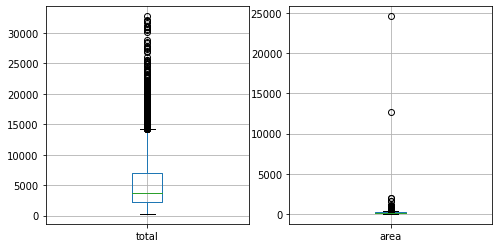

In [6]:
plt.figure(figsize=(8,4))
plt.subplot(121); dc_std.boxplot(['total'])
plt.subplot(122); dc_std.boxplot(['area'])

In [7]:
dc_iqr.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,10993.000000,10994.000000,11068.000000,8135.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000
mean,128.370690,2.416409,2.144651,2.032821,820.518883,3432.489971,47.701391,4557.751599,585.927720,73.661637,226.455728,10.309722
std,166.343212,1.132361,1.338094,1.401387,893.913079,2538.420532,72.726753,3233.790034,555.951272,35.654738,172.718755,5.091272
min,1.000000,1.000000,1.000000,1.000000,0.000000,200.000000,3.000000,263.500000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,1.000000,1.000000,170.000000,1550.000000,21.000000,2092.000000,144.000000,51.000000,96.000000,7.000000
50%,86.000000,2.000000,2.000000,2.000000,547.000000,2530.000000,35.000000,3544.500000,400.000000,72.000000,180.000000,10.000000
75%,164.000000,3.000000,3.000000,3.000000,1200.000000,4500.000000,63.000000,6230.000000,900.000000,93.000000,312.000000,13.000000
max,12732.000000,10.000000,25.000000,12.000000,8000.000000,13500.000000,6000.000000,14199.000000,6444.000000,358.000000,2148.000000,51.000000


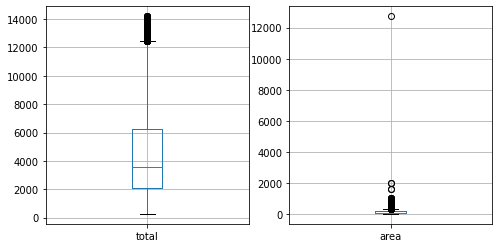

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(121); dc_iqr.boxplot(['total'])
plt.subplot(122); dc_iqr.boxplot(['area'])

In [9]:
dc = data.copy()

for var in data:
    print(var)
    
    # verifica se variável é numerica
    if np.issubdtype(dc[var].dtype, np.number):
        print('\tnumérica: removendo outliers via IQR')
        Q1 = dc[var].quantile(0.25)
        Q2 = dc[var].quantile(0.50)
        Q3 = dc[var].quantile(0.75)
        IQR = Q3 - Q1
        print("\tmediana = %.2f IQR = %.2f" % (Q2,IQR))
        # apenas inliers segundo IQR
        dc = dc[(dc[var] >= Q1-(IQR*1.5)) & (dc[var] <= Q3+(IQR*1.5))]

city
area
	numérica: removendo outliers via IQR
	mediana = 91.00 IQR = 134.00
rooms
	numérica: removendo outliers via IQR
	mediana = 2.00 IQR = 2.00
bathroom
	numérica: removendo outliers via IQR
	mediana = 2.00 IQR = 2.00
parking spaces
	numérica: removendo outliers via IQR
	mediana = 2.00 IQR = 2.00
floor
hoa
	numérica: removendo outliers via IQR
	mediana = 750.00 IQR = 1260.00
rent
	numérica: removendo outliers via IQR
	mediana = 3000.00 IQR = 3110.00
tax
insurance
	numérica: removendo outliers via IQR
	mediana = 38.00 IQR = 37.00
total
	numérica: removendo outliers via IQR
	mediana = 3826.00 IQR = 3540.00
page hits
	numérica: removendo outliers via IQR
	mediana = 396.00 IQR = 769.00
days available
	numérica: removendo outliers via IQR
	mediana = 71.00 IQR = 42.00
interactions
	numérica: removendo outliers via IQR
	mediana = 168.00 IQR = 208.00
weeks available
	numérica: removendo outliers via IQR
	mediana = 10.00 IQR = 6.00
type


**Nota:** <font color="blue">Reparamos que, além de "city", também "floor", "tax" e "type" não são considerados numéricos. Algo a ser investigado se esses atributos forem ser utilizados!</font>

Text(0.5, 1.0, 'Apos remocao de outliers')

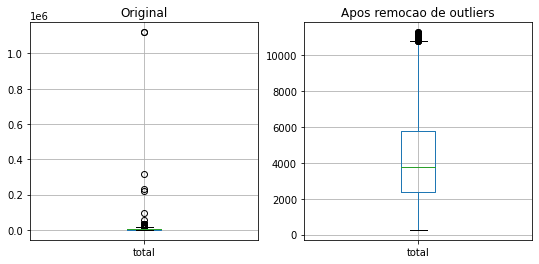

In [10]:
plt.figure(figsize=(9,4))
plt.subplot(121); data.boxplot(['total'])
plt.title('Original')

plt.subplot(122); dc.boxplot(['total']); 
plt.title('Apos remocao de outliers')

### 2. Distribuição dos dados (distribuição Normal)

Podemos assumir que os dados possuem uma distribuição de probabilidade conhecida.

Assim temos um algoritmo que:
1. Estima os parâmetros da distribuição
2. Para cada ponto, computa a probabilidade $p$ de pertencer à distribuição
    1. se $p < \varepsilon$, considerar o ponto como outlier
    2. senão, o ponto é inlier
    
$\varepsilon$ é um limiar (threshold) pré-definido, exemplo: 0.01 (1%)

Vamos utilizar a distribuição Normal ou Gaussiana, mas outras podem ser também utilizadas.

#### Normal univariada

A distribuição Normal (ou Gaussiana) univariada (para uma única variável) é parametrizada por: média (centralidade) e variância (dispersão).
* isso significa que os dados podem ser completamente descritos por esses dois valores.

Escrevemos que um conjunto de dados é bem modelado por uma Gaussiana:
    $$X \sim \mathcal{N}(\mu, \sigma^2)$$
 
A equação que define a distribuição Gaussiana é dada por uma exponencial negativa conforme se afasta de um ponto médio $\mu$:

$$e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Note o termo:
$$-\frac{(x-\mu)^2}{2\sigma^2}$$


(100,)


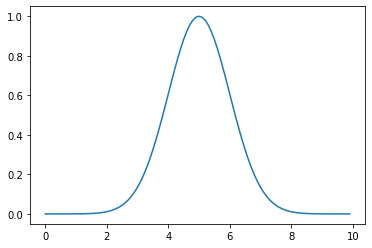

In [11]:
mu = 5 # média = 5
s2 = 1 # variancia = 1
x = np.arange(0, 10.00, 0.1)
print(x.shape)
termo_gauss = np.exp(-((x-mu)**2/(2*s2**2)))
plt.plot(x,termo_gauss)


A probabilidade de um determinado ponto $x$ pertencer à $X$ é dada por:

$$p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Esse termo que multiplica a exponencial é para *normalizar* os valores de forma a somar 1, pois isso é **requerido para que consideremos uma distribuição de probabilidade**.
* faz sentido - a soma de todas as probabilidades tem que ser 1 (100%)



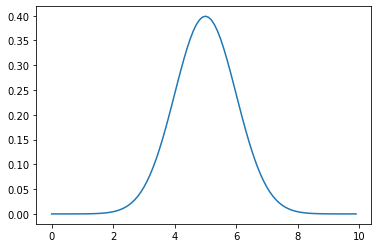

In [12]:
dist_gauss = np.exp(-(((x-mu)**2)/(2*s2)))/(np.sqrt(2*np.pi)*s2)
plt.plot(x,dist_gauss)


Vamos analisar um dos atributos, "weeks available" (semanas disponível), primeiro visualizando quantos valores distintos existem e o histograma

In [13]:
data['weeks available'].unique().shape

(50,)

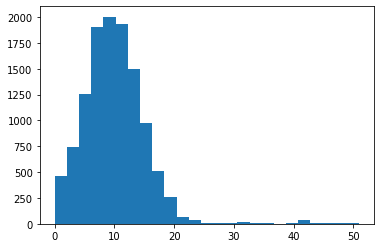

In [16]:
hw = plt.hist(data['weeks available'], bins=25)

Notamos que o atributo parece ter o formato de uma Gaussiana, então vamos aplicar o algoritmo.

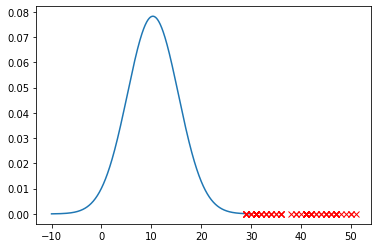

In [17]:
def detect_outlier_Normal(attribute, epsilon=0.001, plotdist=False):
    """Funcao para detectar outliers com base na distribuicao Gaussiana univariada
    Parametros:
        - attribute: vetor de atributos/features
        - epsilon: limiar para rejeitar pontos como pertencendo a distribuicao (default:0.001)
        - plotdist: opcao que permite grafar a distribuicao com os parametros estimados
    Retorno:
        vetor com os índices dos outliers detectados
    """
    mean = np.mean(attribute)
    stdv  = np.std(attribute)
        
    # array vazio
    outliers = []
    for x,i in zip(attribute, range(0,len(attribute))):
        p_x = np.exp(-(((x-mean)**2)/(2*stdv**2))) / (np.sqrt(2*np.pi)*stdv)
        
        if (p_x < epsilon):
            outliers.append(i)
            
    outliers = np.array(outliers)
    
    if plotdist:
        x = np.arange(int(mean-4*stdv),int(mean+4*stdv),stdv/100.0)
        dist_gauss = np.exp(-(((x-mean)**2)/(2*(stdv**2)))) / (np.sqrt(2*np.pi)*stdv)
        plt.figure()
        plt.plot(x, dist_gauss)
        plt.plot(attribute[outliers], np.zeros(outliers.shape[0]), 'xr')
    
    return outliers
    
outl = detect_outlier_Normal(data['weeks available'], epsilon=0.0001, plotdist=True)
#print(data.loc[outl,'weeks available'])

### 3. Agrupamento

Outra técnica consiste em utilizar aprendizado não-supervisionado, inferindo agrupamentos e verificando se há pontos isolados em certos grupos.

Vamos considerar um par de atributos para considerar ao mesmo tempo: rent e hoa

O método utilizado será o DBSCAN - *Density-Based Spatial Clustering of Applications with Noise*, mas outros também podem ser empregados na mesma lógica:
* agrupamentos (clusters) isolados com poucos pontos tendem a indicar outliers

Número de agrupamentos estimado: 8
Número de outliers estimados: 35
Coeficiente de silhueta: 0.006


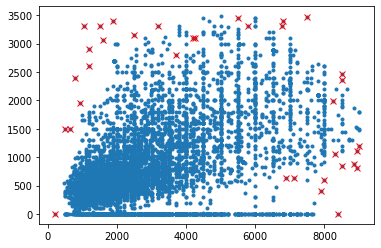

In [21]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

X1 = np.array(dc['rent'])
X2 = np.array(dc['hoa'])
X = np.vstack((X1,X2)).T

# aprende o agrupamento
# eps = distancia máxima para dois pontos serem considerados vizinhos
#     (depende bastante da amplitude dos atributos)
# min_samples = minimo de exemplos numa vizinhanca para considerar um 
#               agrupamento
db = DBSCAN(eps = 200, min_samples=3).fit(X)
clusters = db.labels_

# número de rótulos -1 sao considerados outliers!
n_outl_ = list(clusters).count(-1)
# retirando os outliers, quantos clusters foram encontrados:
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
# índices dos outliers
outl_ind = np.where(clusters==-1)

print('Número de agrupamentos estimado: %d' % n_clusters_)
print('Número de outliers estimados: %d' % n_outl_)
print("Coeficiente de silhueta: %0.3f"
      % metrics.silhouette_score(X, clusters))

plt.plot(X1, X2,'.')
plt.plot(X1[outl_ind], X2[outl_ind],'xr')
plt.show()

### Resumo e considerações finais

* É possível projetar métodos automáticos para detectar anomalias em bases de dados maiores e mais complexas.


* Nessa aula vimos métodos estatísticos e baseados em aprendizado não-supervisionado.


* Há ainda métodos projetados exclusivamente para detectar anomalias, que também podem ser utilizados. 
    * Esses métodos consideram diferentes embasamentos teóricos, 
    * a maior parte considera que será feito um treinamento com dados não contaminados.
    * podem ser utilizadas para realizar o que é chamado de *deteccao de novidades*: reconhecer se um novo ponto é um outlier dado um conjunto de treinamento sem outliers
    

* Para tratar bases de dados, combinar métodos automáticos com análise exploratória é importante
    * produzir um relatório inicial com os problemas levantados e então buscar conhecimento do domínio para entender os dados em mãos